In [1]:
%matplotlib inline

# LinearRegression

A implementation of Ordinary Least Squares simple and multiple linear regression.

> from mlxtend.regressor import LinearRegression

## Overview

Illustration of a simple linear regression model:
    
![](./LinearRegression_files/simple_regression.png)

In Ordinary Least Squares (OLS) Linear Regression, our goal is to find the line (or hyperplane) that minimizes the vertical offsets. Or in other words, we define the best-fitting line as the line that minimizes the sum of squared errors (SSE) or mean squared error (MSE) between our target variable (y) and our predicted output over all samples $i$ in our dataset of size $n$.

$$SSE =  \sum_i \big(\text{target}^{(i)} - \text{output}^{(i)}\big)^2$$

$$MSE = \frac{1}{n} \times SSE$$


Now, `LinearRegression` implements a linear regression model for performing ordinary least squares regression using one of the following five approaches:

- Normal Equations
- QR Decomposition Method
- SVD (Singular Value Decomposition) method
- Gradient Descent
- Stochastic Gradient Descent


### Normal Equations (closed-form solution)

The closed-form solution should be preferred for "smaller" datasets where calculating (a "costly") matrix inverse is not a concern. For very large datasets, or datasets where the inverse of $[X^T X]$ may not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity), the QR, SVD or gradient descent approaches are to be preferred.

The linear function (linear regression model) is defined as:

$$y = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum_{i=0}^{m} = \mathbf{w}^T\mathbf{x}$$

where $y$ is the response variable, $\mathbf{x}$ is an $m$-dimensional sample vector, and $\mathbf{w}$ is the weight vector (vector of coefficients). Note that $w_0$ represents the y-axis intercept of the model and therefore $x_0=1$.  

Using the closed-form solution (normal equation), we compute the weights of the model as follows:

$$ \mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$$

### Stable OLS via QR Factorization

The QR decomposition method offers a more numerically stable alternative to the closed-form, analytical solution based on the "normal equations," and it can be used to compute the inverse of large matrices more efficiently.

QR decomposition method decomposes given matrix into two matrices for which an inverse can be easily obtained. For instance, a given matrix $X \in \mathbb{R}^{n \times m}$, the QR decomposition into two matrices is:

$$\mathbf{X = QR},$$

where

$Q \in \mathbb{R}^{n \times m}$ is an orthonormal matrix, such that $Q^\top Q = QQ^\top = I$. 
The second matrix $R \in \mathbf{R}^{m \times m}$ is an upper triangular matrix.

The weight parameters of the ordinary least squares regression model can then be computed as follows [1]:

$$\mathbf{w} = \mathbf{R}^{-1}\mathbf{Q}^\top y.$$

### Stable OLS via Singular Value Decomposition

Another alternative way for obtaining the OLS model weights in a numerically stable fashion is by Singular Value Decomposition (SVD), which is defined as:

$$\mathbf{X}=\mathbf{U}\Sigma \mathbf{V}^\top,$$

for a given matrix $\mathbf{X}$.

Then, it can be shown that the pseudo-inverse of $X$, $X^+$, can be obtained as follows [1]:

$$ X^+ = \mathbf{U} \mathbf{\Sigma}^+  V^{\top}.$$

Note that while $\Sigma$ is the diagonal matrix consisting of singular values of $\mathbf{X}$, $\Sigma^{+}$ is the diagonal matrix consisting of the reciprocals of the singular values.

The model weights can then be computed as follows:

$$\mathbf{w} = \mathbf{X}^+  \mathbf{y}.$$

Please note that this OLS method is computationally most inefficient. However, it is a useful approach when the direct method (normal equations) or QR factorization cannot be applied or the normal equations (via $\mathbf{X}^T \mathbf{X}$) are ill-conditioned.




### Gradient Descent (GD)  and Stochastic Gradient Descent (SGD) 

See [Gradient Descent and Stochastic Gradient Descent](../general_concepts/gradient-optimization.md) and [Deriving the Gradient Descent Rule for Linear Regression and Adaline](../general_concepts/linear-gradient-derivative.md) for details.

Random shuffling is implemented as:

- for one or more epochs
    - randomly shuffle samples in the training set
        - for training sample *i*
            - compute gradients and perform weight updates

### References

- [1] Chapter 3, page 55, Linear Methods for Regression. Trevor Hastie; Robert Tibshirani; Jerome Friedman (2009). [The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd ed.)](http://statweb.stanford.edu/~tibs/ElemStatLearn/download.html). New York: Springer. (ISBN 978–0–387–84858–7)
- [2] G. Strang, Linear Algebra and Its Applications, 2nd Ed., Orlando, FL, Academic Press, Inc., 1980, pp. 139-142.

## Example 1 - Closed Form Solution

Intercept: 0.25
Slope: 0.81


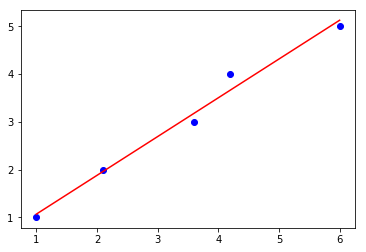

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1.0, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0])

ne_lr = LinearRegression()
ne_lr.fit(X, y)

print('Intercept: %.2f' % ne_lr.b_)
print('Slope: %.2f' % ne_lr.w_[0])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, ne_lr)
plt.show()

## Example 2 - QR decomposition method

Intercept: 0.25
Slope: 0.81


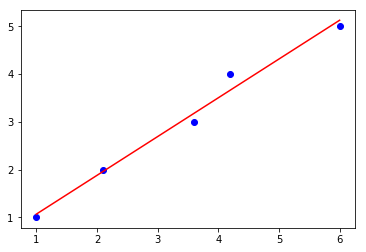

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1.0, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0])

qr_lr = LinearRegression(method='qr')
qr_lr.fit(X, y)

print('Intercept: %.2f' % qr_lr.b_)
print('Slope: %.2f' % qr_lr.w_[0])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, qr_lr)
plt.show()

## Example 3 - SVD method

Intercept: 0.25
Slope: 0.81


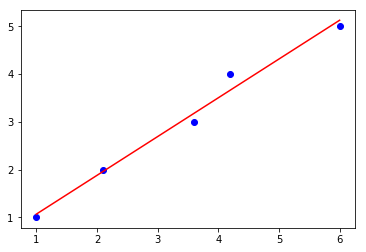

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1.0, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0])

svd_lr = LinearRegression(method='svd')
svd_lr.fit(X, y)

print('Intercept: %.2f' %svd_lr.b_)
print('Slope: %.2f' % svd_lr.w_[0])

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, svd_lr)
plt.show()

## Example 4 - Gradient Descent

Iteration: 100/100 | Cost 0.08 | Elapsed: 0:00:00 | ETA: 0:00:00

Intercept: 0.22
Slope: 0.82


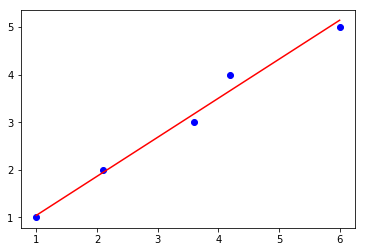

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1.0, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0])

gd_lr = LinearRegression(method='sgd',
                         eta=0.005, 
                         epochs=100,
                         minibatches=1,
                         random_seed=123,
                         print_progress=3)
gd_lr.fit(X, y)

print('Intercept: %.2f' % gd_lr.b_)
print('Slope: %.2f' % gd_lr.w_)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, gd_lr)
plt.show()

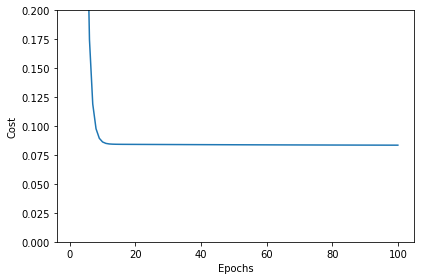

In [6]:
# Visualizing the cost to check for convergence and plotting the linear model:

plt.plot(range(1, gd_lr.epochs+1), gd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()    

## Example 5 - Stochastic Gradient Descent

Intercept: 0.82
Slope: 0.24


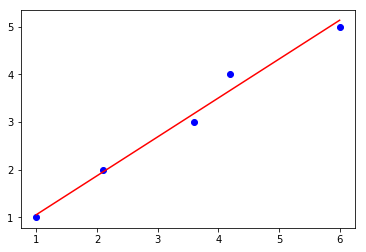

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1.0, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0])

sgd_lr = LinearRegression(method='sgd',
                          eta=0.01, 
                          epochs=100, 
                          random_seed=0, 
                          minibatches=len(y))
sgd_lr.fit(X, y)

print('Intercept: %.2f' % sgd_lr.w_)
print('Slope: %.2f' % sgd_lr.b_)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, sgd_lr)
plt.show()

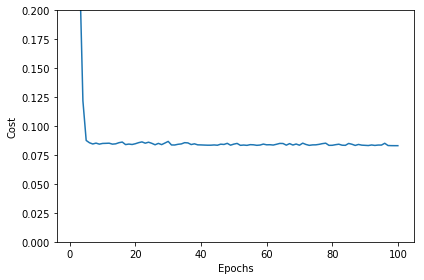

In [8]:
plt.plot(range(1, sgd_lr.epochs+1), sgd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()  

## Example 6 - Stochastic Gradient Descent with Minibatches

Intercept: 0.24
Slope: 0.82


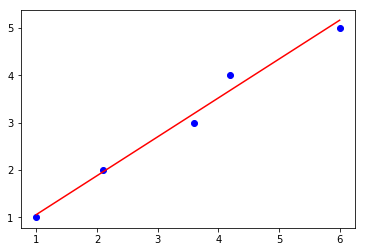

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.regressor import LinearRegression

X = np.array([ 1.0, 2.1, 3.6, 4.2, 6])[:, np.newaxis]
y = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0])

sgd_lr = LinearRegression(method='sgd',
                          eta=0.01, 
                          epochs=100, 
                          random_seed=0, 
                          minibatches=3)
sgd_lr.fit(X, y)

print('Intercept: %.2f' % sgd_lr.b_)
print('Slope: %.2f' % sgd_lr.w_)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, y, sgd_lr)
plt.show()

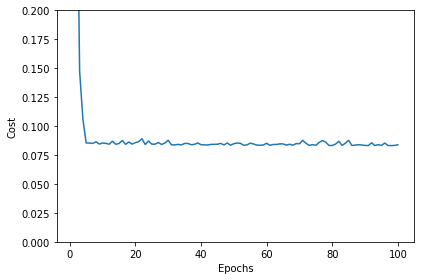

In [10]:
plt.plot(range(1, sgd_lr.epochs+1), sgd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()  

## API

In [11]:
with open('../../api_modules/mlxtend.regressor/LinearRegression.md', 'r') as f:
    print(f.read())

## LinearRegression

*LinearRegression(method='direct', eta=0.01, epochs=50, minibatches=None, random_seed=None, print_progress=0)*

Ordinary least squares linear regression.

**Parameters**

- `method` : string (default: 'direct')

    For gradient descent-based optimization, use `sgd` (see `minibatch`
    parameter for further options). Otherwise, if `direct` (default),
    the analytical method is used. For alternative, numerically more
    stable solutions, use either `qr` (QR decomopisition) or `svd`
    (Singular Value Decomposition).

- `eta` : float (default: 0.01)

    solver learning rate (between 0.0 and 1.0). Used with `method =`
    `'sgd'`. (See `methods` parameter for details)

- `epochs` : int (default: 50)

    Passes over the training dataset.
    Prior to each epoch, the dataset is shuffled
    if `minibatches > 1` to prevent cycles in stochastic gradient descent.
    Used with `method = 'sgd'`. (See `methods` parameter for details)

- `minibatches` : int (default: N